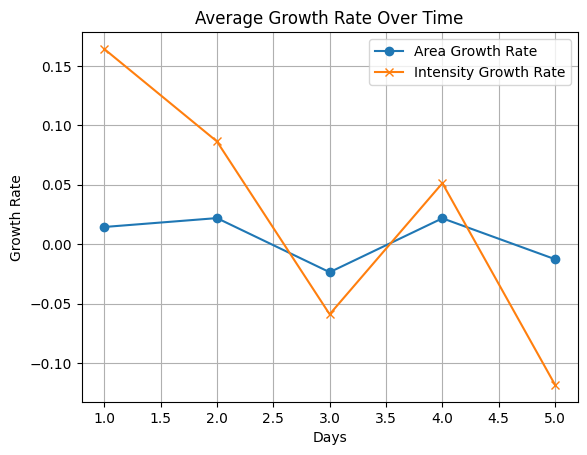

Day 1, Click 1 - Area: 37682.0 pixels squared
Day 1, Click 1 - Mean Intensity: 130.70765480895915
Day 1, Click 2 - Area: 38227.0 pixels squared
Day 1, Click 2 - Mean Intensity: 152.17632411067194
Day 1, Click 3 - Area: 39066.0 pixels squared
Day 1, Click 3 - Mean Intensity: 165.33006587615284
Day 1, Click 4 - Area: 38145.0 pixels squared
Day 1, Click 4 - Mean Intensity: 155.5815283267457
Day 2, Click 1 - Area: 38976.0 pixels squared
Day 2, Click 1 - Mean Intensity: 163.5702766798419
Day 2, Click 2 - Area: 38483.0 pixels squared
Day 2, Click 2 - Mean Intensity: 144.20703557312254
Day 2, Click 3 - Area: 43709.0 pixels squared
Day 2, Click 3 - Mean Intensity: 134.22123847167325
Day 2, Click 4 - Area: 50068.0 pixels squared
Day 2, Click 4 - Mean Intensity: 152.92690382081688
Day 3, Click 1 - Area: 38435.0 pixels squared
Day 3, Click 1 - Mean Intensity: 159.31108036890646
Day 3, Click 2 - Area: 37398.0 pixels squared
Day 3, Click 2 - Mean Intensity: 147.9942160737813
Day 3, Click 3 - Area: 

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function for area calculation
def calculate_area(mask):
    # Calculate the area of the segmented region
    area = np.sum(mask) / 255.0  # Convert to binary mask (0 or 255)
    return area

# Function for intensity analysis
def analyze_intensity(segmented_image):
    # Convert the segmented image to grayscale
    gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Compute the mean intensity of the segmented region
    mean_intensity = np.mean(gray_image)
    return mean_intensity

# Function for comparing growth over n days
def compare_growth(data):
    # Assuming 'data' is a list of area or intensity values for each day
    growth_rate = []
    for i in range(1, len(data)):
        rate = (data[i] - data[i-1]) / data[i-1]
        growth_rate.append(rate)
    return growth_rate

# Load segmented images for each day
segmented_images = []
clicks_per_day = 4
total_days = 5

for day in range(1, total_days + 1):
    for click in range(1, clicks_per_day + 1):
        image_path = f"cropped_image_{(day-1)*clicks_per_day + click}.jpg"
        if os.path.exists(image_path):
            segmented_image = cv2.imread(image_path)
            segmented_images.append(segmented_image)
        else:
            print(f"Error: Image for day {day}, click {click} not found.")
            segmented_images.append(None)

# Calculate area and intensity for each day
area_data = []
intensity_data = []
for segmented_image in segmented_images:
    if segmented_image is not None:
        # Noise Reduction
        segmented_image = cv2.GaussianBlur(segmented_image, (5, 5), 0)
        
        # Convert to grayscale
        gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
        
        # Contrast Enhancement
        equalized_image = cv2.equalizeHist(gray_image)
        
        # Thresholding
        _, binary_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Contour Detection
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Masking
        mask = np.zeros_like(binary_image)
        cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
        
        area = calculate_area(mask)
        intensity = analyze_intensity(segmented_image)
        area_data.append(area)
        intensity_data.append(intensity)
    else:
        area_data.append(None)
        intensity_data.append(None)

# Compare growth over n days
area_growth_rate = compare_growth(area_data)
intensity_growth_rate = compare_growth(intensity_data)

# Plotting the growth rate graph
total_images = len(segmented_images)  # Calculate total images
total_days = total_images // clicks_per_day  # Calculate total days
days = np.arange(1, total_days + 1)  # Generate x-axis values for each day
plt.plot(days, area_growth_rate[:total_days], marker='o', label='Area Growth Rate')
plt.plot(days, intensity_growth_rate[:total_days], marker='x', label='Intensity Growth Rate')
plt.xlabel('Days')
plt.ylabel('Growth Rate')
plt.title('Average Growth Rate Over Time')
plt.legend()
plt.grid(True)
plt.savefig('growth_rate_graph.png')
plt.show()

# Print or visualize the results
for idx, (segmented_image, area, intensity) in enumerate(zip(segmented_images, area_data, intensity_data), start=1):
    if segmented_image is not None:
        # Calculate the corresponding day
        day = (idx - 1) // clicks_per_day + 1
        
        # Display segmented image
        cv2.imshow(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Segmented Image", segmented_image)
        
        # Print area and intensity data
        print(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Area: {area} pixels squared")
        print(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Mean Intensity: {intensity}")

        # Display image of fungus growth
        cv2.imshow(f"Fungus Growth - Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day}", segmented_image)
        
        # Wait for key press to move to next image or exit
        key = cv2.waitKey(0)  # Changed from cv2.waitKey(1)
